In [10]:
import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#NYC311_df = pd.read_csv(r'C:\Users\SeemaJT\Downloads\Python\Final project\submission\311_srs_2009_sample.csv')
NYC311_df = pd.read_csv(r'C:\Users\SeemaJT\Downloads\Python\Final project\submission\311_Service_Requests_for_2009.csv', usecols=['Created Date','Closed Date','Agency', 'Complaint Type', 'City'])


In [13]:
NYC311_df.shape

(1783133, 5)

In [14]:
#Drop the records whose Closed Date is not set. Means still those tickets are open
NYC311_df = NYC311_df.dropna(subset=['Closed Date'])
NYC311_df.shape

(1723802, 5)

In [15]:
#59331 observations does not have the close date. 
#Means those were still open. Hence removed them from analysis data
NYC311_df.head()

,Created Date,Closed Date,Agency,Complaint Type,City
0,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,HEATING,BROOKLYN
2,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Traffic Signal Condition,BROOKLYN
3,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Traffic Signal Condition,BROOKLYN
4,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Traffic Signal Condition,BROOKLYN
5,01/01/2009 12:00:00 AM,01/12/2009 12:00:00 AM,HPD,HEATING,OZONE PARK


In [ ]:
#Day of the week
temp = pd.DatetimeIndex(NYC311_df['Created Date'])
NYC311_df['day'] = temp.weekday

In [45]:
NYC311_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,weekday
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)",2009-01-01
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)",2009-01-01
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)",2009-01-01
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)",2009-01-01
5,12826508,01/01/2009 12:00:00 AM,01/12/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11417,103-60 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.682935,-73.837448,"(40.68293534353076, -73.83744823185012)",2009-01-01


In [46]:
#Get the count for Complaint type & City
new_Type_City_df = pd.core.frame.DataFrame({'count' : 
                        NYC311_df.groupby( [ "Complaint Type", "City"] ).size()}).reset_index()

In [47]:
new_Type_City_df.head()

,Complaint Type,City,count
0,APPLIANCE,ARVERNE,67
1,APPLIANCE,ASTORIA,77
2,APPLIANCE,BAYSIDE,4
3,APPLIANCE,BELLEROSE,4
4,APPLIANCE,BRONX,5038


In [48]:
#get the count for Complaint Type only
new_CompType_df = pd.core.frame.DataFrame({'count' : 
        NYC311_df.groupby( [ "Complaint Type"] ).size()}).reset_index()

In [49]:
new_CompType_df.describe()

,count
count,153.000000
mean,11266.679739
std,29207.586513
min,1.000000
25%,83.000000
50%,1177.000000
75%,5931.000000
max,238737.000000


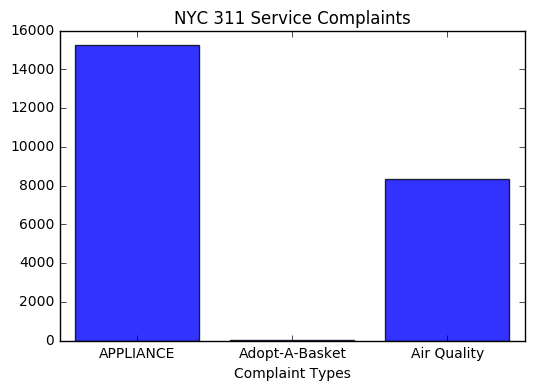

In [50]:
y_pos = np.arange(len(new_CompType_df['Complaint Type'][:3]))
plt.bar(y_pos, new_CompType_df['count'][:3], align='center', alpha=0.8)
plt.xticks(y_pos,  new_CompType_df['Complaint Type'])
plt.xlabel('Complaint Types')
plt.title('NYC 311 Service Complaints')
 
plt.show()

In [51]:
new_CompType_sorted_df = new_CompType_df.sort(['count'], ascending=[False])

C:\Users\SeemaJT\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [52]:
new_CompType_sorted_df.shape

(153, 2)

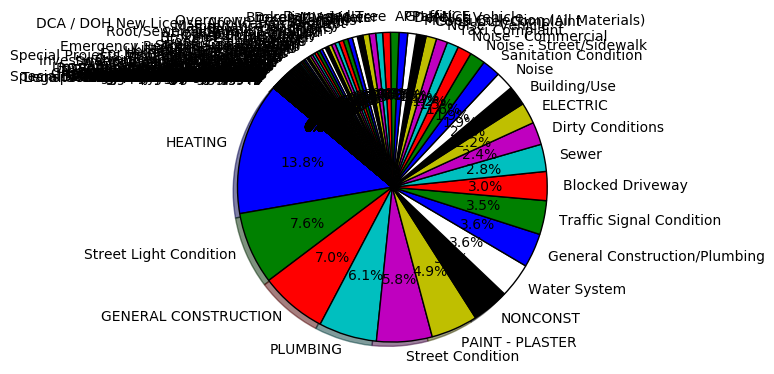

In [53]:
plt.pie(new_CompType_sorted_df['count'], labels=new_CompType_sorted_df['Complaint Type'], autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [54]:
#Display the complaint type and city together
new_Type_City_sorted_df = new_Type_City_df.sort(['count'], ascending=[False])
new_Type_City_sorted_df.shape

C:\Users\SeemaJT\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


(5302, 3)

In [55]:
#List the Complaint Type & City with count in descending order
new_Type_City_sorted_df.head(10)

,Complaint Type,City,count
2250,HEATING,BROOKLYN,79749
2249,HEATING,BRONX,76520
2272,HEATING,NEW YORK,48332
2114,GENERAL CONSTRUCTION,BROOKLYN,42524
2113,GENERAL CONSTRUCTION,BRONX,39114
3479,PLUMBING,BROOKLYN,36658
3478,PLUMBING,BRONX,33263
3433,PAINT - PLASTER,BRONX,28769
3434,PAINT - PLASTER,BROOKLYN,28437
4278,Street Condition,BROOKLYN,28392


In [56]:
#Display the major complaint types and their count
new_CompType_sorted_df.shape

(153, 2)

In [57]:
#List the complaint type with count in descending order
new_CompType_sorted_df

,Complaint Type,count
54,HEATING,238737
124,Street Light Condition,130178
51,GENERAL CONSTRUCTION,120656
93,PLUMBING,104591
123,Street Condition,99926
92,PAINT - PLASTER,83978
80,NONCONST,66649
150,Water System,62452
52,General Construction/Plumbing,61253
134,Traffic Signal Condition,60970


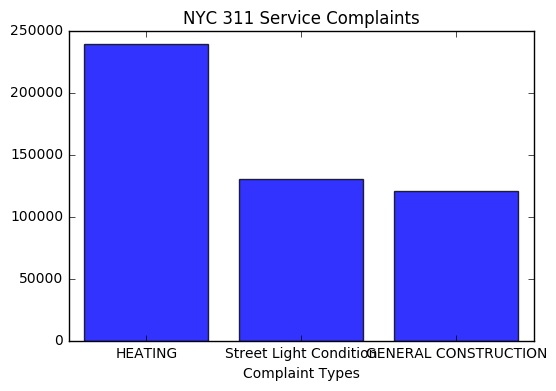

In [58]:
y_pos = np.arange(len(new_CompType_sorted_df['Complaint Type'][:3]))
plt.bar(y_pos, new_CompType_sorted_df['count'][:3], align='center', alpha=0.8)
plt.xticks(y_pos,  new_CompType_sorted_df['Complaint Type'])
plt.xlabel('Complaint Types')
plt.title('NYC 311 Service Complaints')
 
plt.show()

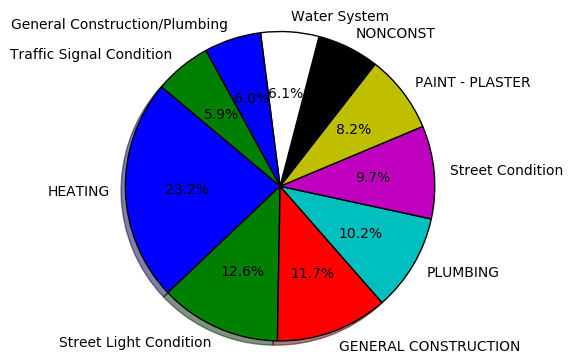

In [59]:
plt.pie(new_CompType_sorted_df['count'][:10], labels=new_CompType_sorted_df['Complaint Type'][:10], autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [60]:
#get the count for Complaint Type & weekday 
new_CompType_weekday_df = pd.core.frame.DataFrame({'count' : 
        NYC311_df.groupby( [ "Complaint Type", "weekday"] ).size()}).reset_index()

In [61]:
new_CompType_weekday_df.head()

,Complaint Type,weekday,count
0,APPLIANCE,2009-01-01,23
1,APPLIANCE,2009-01-02,44
2,APPLIANCE,2009-01-03,22
3,APPLIANCE,2009-01-04,20
4,APPLIANCE,2009-01-05,58


In [62]:
#Filtering the specific rows
new_heating_df = new_CompType_weekday_df[new_CompType_weekday_df["Complaint Type"].isin(['HEATING'])]

In [63]:
#new_test_df

In [64]:
new_heating_df

,Complaint Type,weekday,count
13438,HEATING,2009-01-01,2739
13439,HEATING,2009-01-02,1956
13440,HEATING,2009-01-03,1303
13441,HEATING,2009-01-04,1134
13442,HEATING,2009-01-05,1024
13443,HEATING,2009-01-06,1459
13444,HEATING,2009-01-07,1254
13445,HEATING,2009-01-08,1421
13446,HEATING,2009-01-09,1681
13447,HEATING,2009-01-10,1804


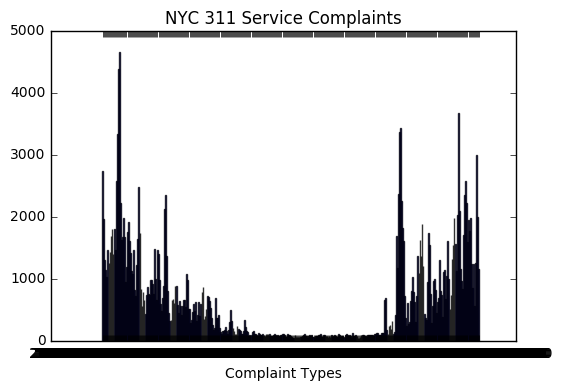

In [65]:
y_pos = np.arange(len(new_heating_df['Complaint Type']))
plt.bar(y_pos, new_heating_df['count'], align='center', alpha=0.8)
plt.xticks(y_pos,  new_heating_df['weekday'])
plt.xlabel('Complaint Types')
plt.title('NYC 311 Service Complaints')
 
plt.show()

In [66]:
print pd.to_datetime(NYC311_df['Created Date'])


0         2009-01-01
2         2009-01-01
3         2009-01-01
4         2009-01-01
5         2009-01-01
6         2009-01-01
7         2009-01-01
8         2009-01-01
9         2009-01-01
10        2009-01-01
11        2009-01-01
12        2009-01-01
13        2009-01-01
14        2009-01-01
15        2009-01-01
16        2009-01-01
18        2009-01-01
19        2009-01-01
20        2009-01-01
21        2009-01-01
22        2009-01-01
23        2009-01-01
24        2009-01-01
25        2009-01-01
26        2009-01-01
27        2009-01-01
28        2009-01-01
29        2009-01-01
30        2009-01-01
31        2009-01-01
             ...    
1783100   2009-05-02
1783101   2009-02-07
1783102   2009-02-18
1783103   2009-01-24
1783104   2009-04-16
1783105   2009-04-19
1783106   2009-06-22
1783107   2009-11-14
1783108   2009-11-15
1783109   2009-11-15
1783110   2009-11-15
1783111   2009-11-15
1783112   2009-11-15
1783115   2009-11-16
1783116   2009-11-16
1783117   2009-11-16
1783118   200